In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
import pickle

In [5]:
activity = {
    1: "WALKING",
    2: "WALKING UPSTAIRS",
    3: "WALKING DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

In [6]:
def sampler(df):
    df_freq = df.iloc[::2]
    df_final = df_freq[100:600]
    return df_final

In [15]:
directory = "DataFiles"
sampled_dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep=",")
        df_sampled = sampler(df.iloc[:, 1:4])
        sampled_dfs.append(df_sampled)

In [16]:
X_test = np.stack(sampled_dfs, axis=0)
y_test = np.array([6, 6, 6, 4, 4, 4, 5, 5, 5, 1, 1, 1, 3, 3, 3, 2, 2, 2])
print(X_test.shape)

(18, 500, 3)


In [17]:
with open('raw.pkl', 'rb') as f:
    raw_model = pickle.load(f)

In [10]:
with open('tsfel.pkl', 'rb') as f:
    tsfel_model = pickle.load(f)

In [11]:
with open('feature.pkl', 'rb') as f:
    feature_model = pickle.load(f)

Accuracy: 0.17
Precision: 0.06
Recall: 0.17


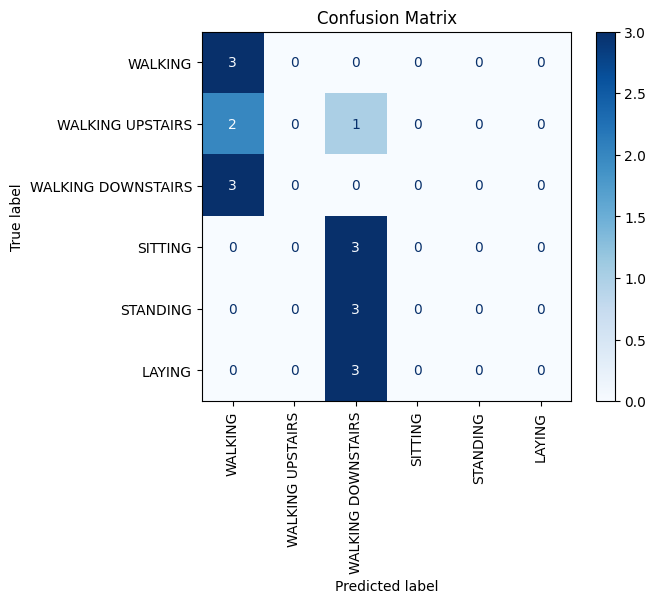

In [18]:
X_test_total_acc = np.sum(X_test**2, axis=2)
y_pred = raw_model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [19]:
import tsfel
cfg = tsfel.get_features_by_domain()

X_test_total_acc = np.sum(X_test**2, axis=2)
X_tsfel_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
X_tsfel_test = np.vstack(X_tsfel_test)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Accuracy: 0.22
Precision: 0.20
Recall: 0.22


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


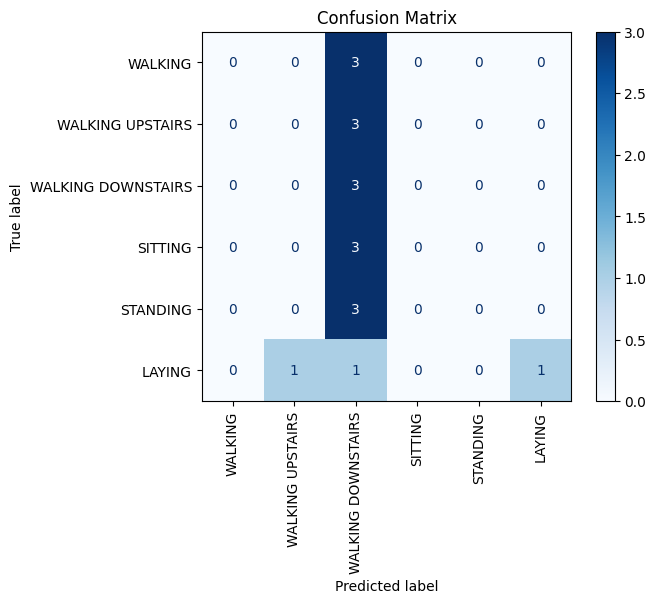

In [26]:
y_pred = tsfel_model.predict(X_tsfel_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.33
Precision: 0.14
Recall: 0.33


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


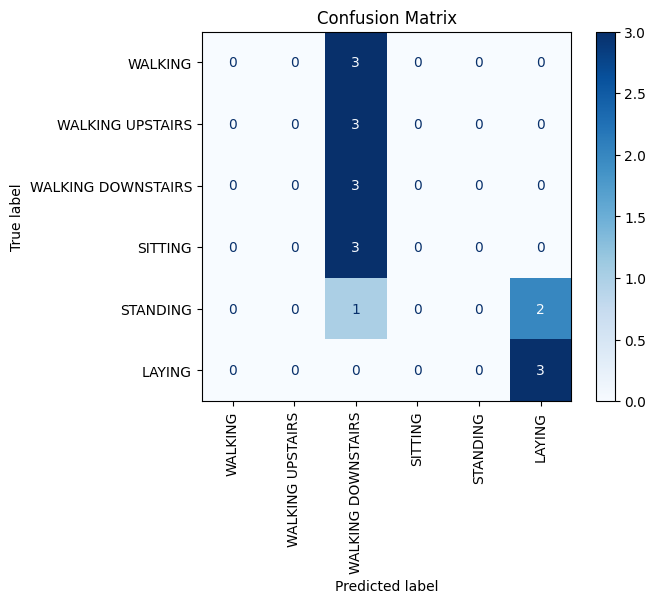

In [29]:
X_feature_test = np.pad(X_tsfel_test, ((0, 0), (0, 561 - X_tsfel_test.shape[1])), mode='constant')

y_pred = feature_model.predict(X_feature_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [21]:
scaler = StandardScaler()
for i in range(X_test.shape[0]):
    X_test[i] = scaler.fit_transform(X_test[i])

Accuracy: 0.17
Precision: 0.08
Recall: 0.17


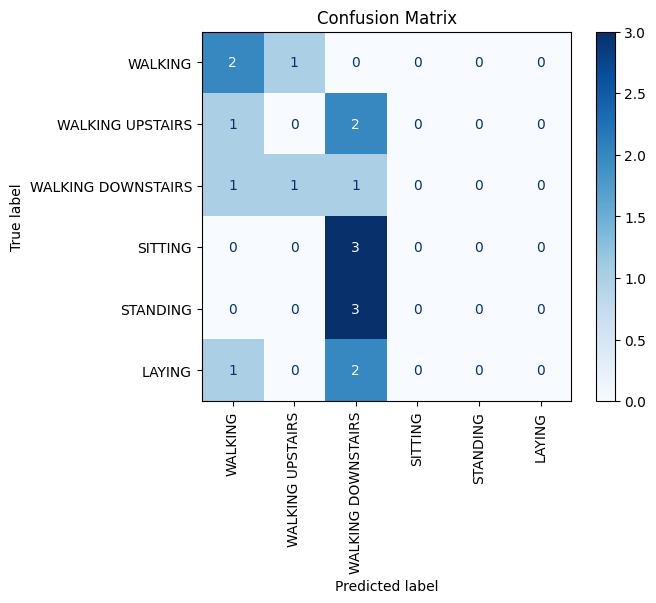

In [22]:
X_test_total_acc = np.sum(X_test**2, axis=2)
y_pred = raw_model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()